In [266]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [267]:
# ---------------------- Load Dataset ----------------------
df = pd.read_excel('/content/project-data.xlsx')
df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [268]:
# ---------------------- Exploratory Data Analysis (EDA) ----------------------
# 1. Dataset overview
df.shape


(615, 13)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     614 non-null    float64
dtypes: float64(10), int64(1), object(2)

In [270]:

df.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [271]:
# 2. Check for missing values
df.isnull().sum()

,0
category,0
age,0
sex,0
albumin,1
alkaline_phosphatase,18
alanine_aminotransferase,1
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,10


In [272]:
# Fill missing numerical values with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

/tmp/ipython-input-3409052313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [273]:
df.isnull().sum()

,0
category,0
age,0
sex,0
albumin,0
alkaline_phosphatase,0
alanine_aminotransferase,0
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,0


In [274]:
df.duplicated().sum()

np.int64(0)

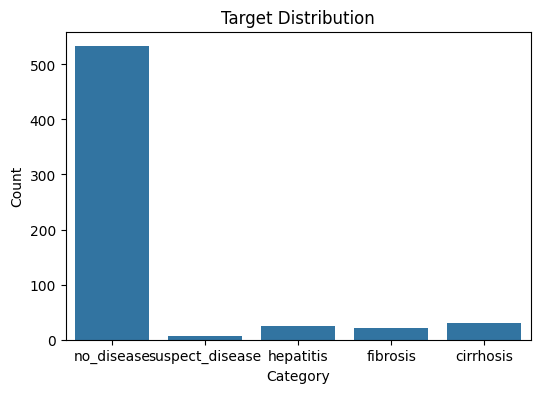

In [275]:

# 3. Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='category', data=df)
plt.title('Target Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



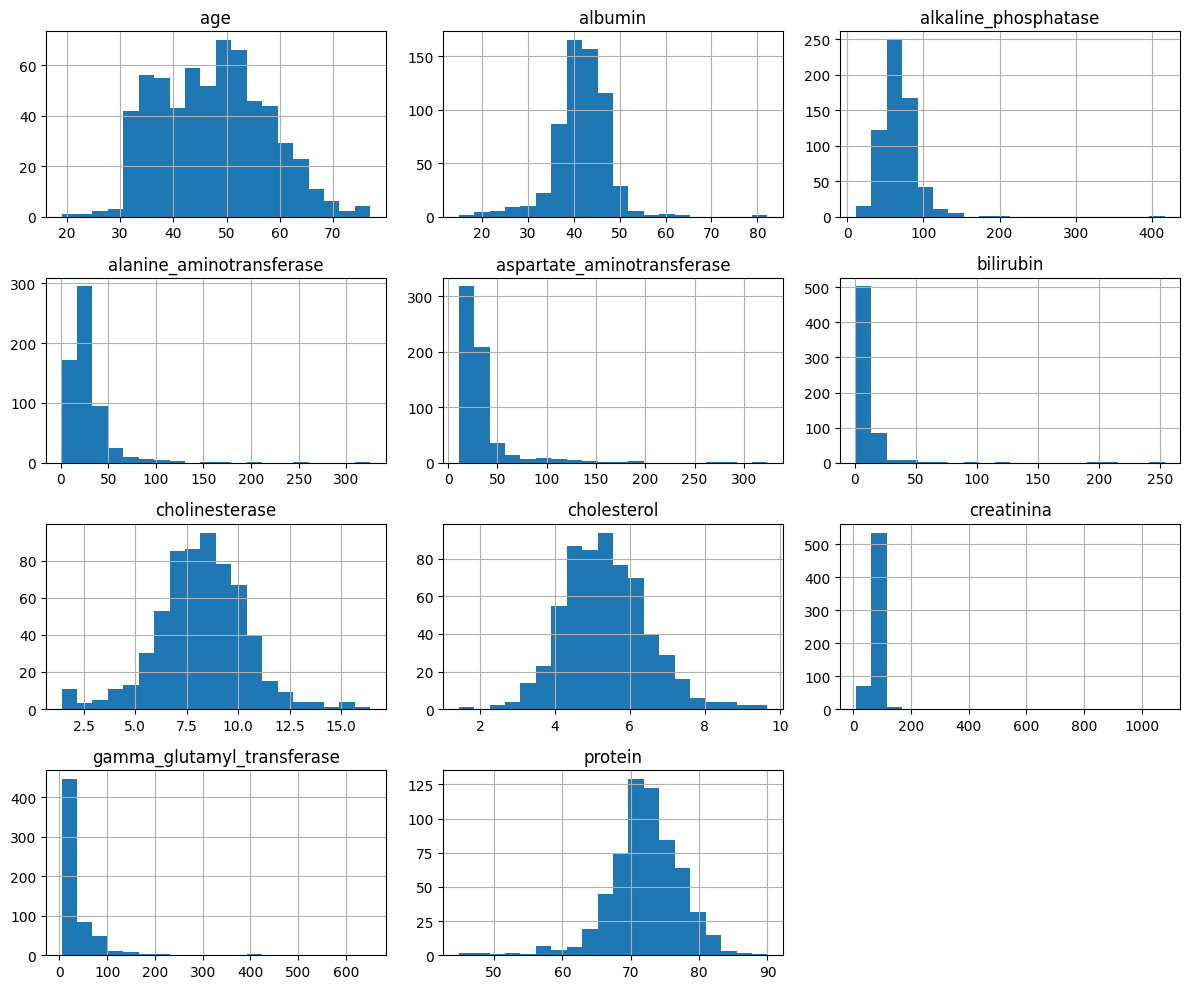

In [276]:
# 4. Numerical features distribution
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.show()


In [277]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
df_encoded = df.copy()
le_category = LabelEncoder()
df_encoded['category'] = le_category.fit_transform(df_encoded['category'])

le_sex = LabelEncoder()
df_encoded['sex'] = le_sex.fit_transform(df_encoded['sex'])

In [278]:


# Now compute the correlation matrix
corr_matrix = df_encoded.corr()
corr_matrix

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
category,1.000000,-0.101460,-0.038391,0.229838,-0.014320,-0.022034,-0.601843,-0.497505,0.349835,0.279847,-0.206598,-0.405606,-0.075278
age,-0.101460,1.000000,-0.024544,-0.196842,0.168080,-0.005690,0.088666,0.032492,-0.075093,0.123789,-0.022296,0.153087,-0.153672
sex,-0.038391,-0.024544,1.000000,0.146138,-0.019808,0.161502,0.130891,0.111177,0.169111,-0.029251,0.159589,0.133276,0.051288
albumin,0.229838,-0.196842,0.146138,1.000000,-0.138015,0.001444,-0.193342,-0.221641,0.375817,0.204731,-0.001594,-0.155440,0.549975
alkaline_phosphatase,-0.014320,0.168080,-0.019808,-0.138015,1.000000,0.166320,0.059637,0.046780,0.033750,0.123197,0.149831,0.440012,-0.055869
alanine_aminotransferase,-0.022034,-0.005690,0.161502,0.001444,0.166320,1.000000,0.273333,-0.038388,0.146729,0.067716,-0.043000,0.248208,0.095016
aspartate_aminotransferase,-0.601843,0.088666,0.130891,-0.193342,0.059637,0.273333,1.000000,0.312231,-0.208536,-0.207938,-0.021387,0.491263,0.039999
bilirubin,-0.497505,0.032492,0.111177,-0.221641,0.046780,-0.038388,0.312231,1.000000,-0.333172,-0.157282,0.031224,0.217024,-0.040729
cholinesterase,0.349835,-0.075093,0.169111,0.375817,0.033750,0.146729,-0.208536,-0.333172,1.000000,0.420215,-0.011157,-0.110345,0.293041
cholesterol,0.279847,0.123789,-0.029251,0.204731,0.123197,0.067716,-0.207938,-0.157282,0.420215,1.000000,-0.047437,-0.007185,0.206255


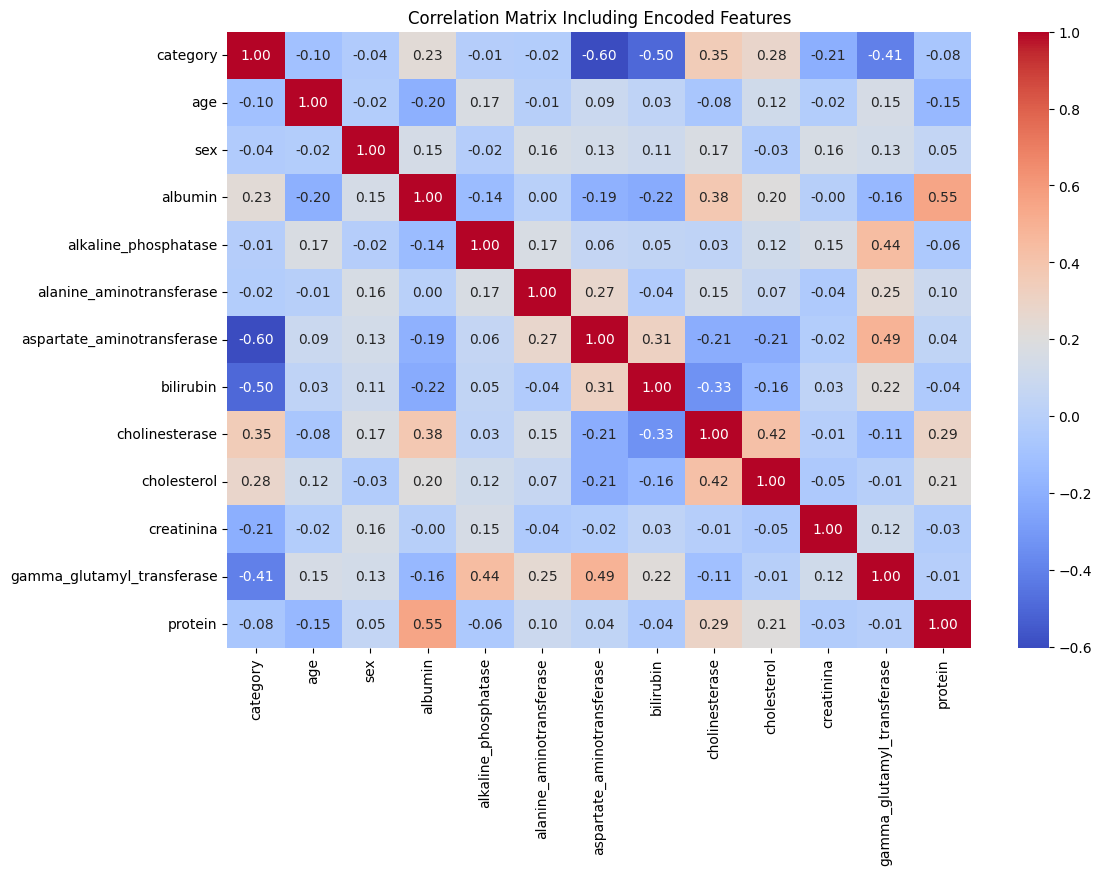

In [279]:

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Including Encoded Features')
plt.show()

In [280]:
# ---------------------- Feature Extraction and Preprocessing ----------------------
# 1. Encode categorical variables
le_category = LabelEncoder()
df['category'] = le_category.fit_transform(df['category'])

le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])

In [281]:
# 2. Define features and target
X = df.drop('category', axis=1)
X

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [282]:
y = df['category']
y

,category
0,3
1,3
2,3
3,3
4,3
...,...
610,0
611,0
612,0
613,0


In [283]:
# 3. Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [284]:
# 4. Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [285]:
# ---------------------- Model Building ----------------------
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [286]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [287]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9268


In [288]:
# Confusion Matrix (printed as array, not heatmap)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  5   1   0   0   0]
 [  1   1   1   1   0]
 [  1   0   1   3   0]
 [  0   0   0 107   0]
 [  0   0   0   1   0]]


In [289]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.50      0.25      0.33         4
           2       0.50      0.20      0.29         5
           3       0.96      1.00      0.98       107
           4       0.00      0.00      0.00         1

    accuracy                           0.93       123
   macro avg       0.53      0.46      0.47       123
weighted avg       0.90      0.93      0.91       123



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [290]:
# ---------------------- ROC-AUC Evaluation ----------------------
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
# Binarize the output
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

In [291]:
# Predict probabilities
y_prob = model.predict_proba(X_test)
y_prob

array([[1.66374478e-03, 8.59873790e-04, 7.90376032e-03, 9.89565997e-01,
        6.62391169e-06],
       [1.90431607e-03, 1.88264191e-03, 9.40190955e-03, 9.86758305e-01,
        5.28275141e-05],
       [2.81937079e-02, 9.90749879e-03, 4.02207950e-04, 9.61013115e-01,
        4.83470692e-04],
       [4.33684379e-04, 1.31357713e-04, 4.61024030e-04, 9.98973491e-01,
        4.42808934e-07],
       [4.57460690e-04, 6.23305634e-03, 8.27944649e-04, 9.92038002e-01,
        4.43536516e-04],
       [3.73891057e-04, 6.61508635e-04, 1.90510352e-04, 9.98269311e-01,
        5.04779207e-04],
       [2.50119452e-04, 5.85011542e-03, 3.71471476e-03, 9.90132756e-01,
        5.22947186e-05],
       [2.19173327e-03, 9.83558587e-04, 6.15254972e-04, 9.95246728e-01,
        9.62725546e-04],
       [9.14806394e-04, 3.55772466e-03, 7.36152522e-03, 9.87665701e-01,
        5.00243150e-04],
       [5.40335466e-04, 6.46448652e-04, 3.54375654e-03, 9.95262499e-01,
        6.96065068e-06],
       [1.45567135e-04, 1.0885

In [292]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [293]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

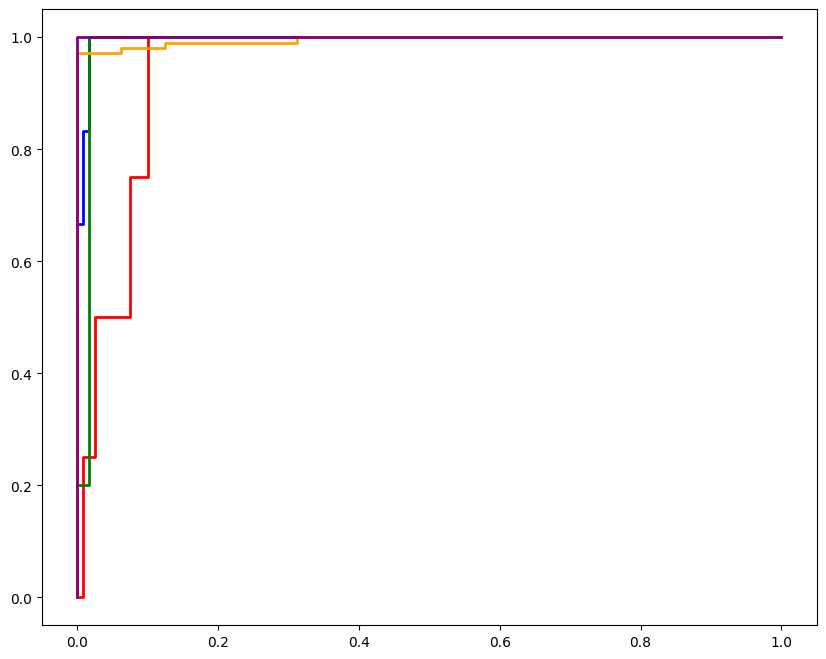

In [294]:
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2,
             label=f'Class {classes[i]} (area = {roc_auc[i]:.2f})')

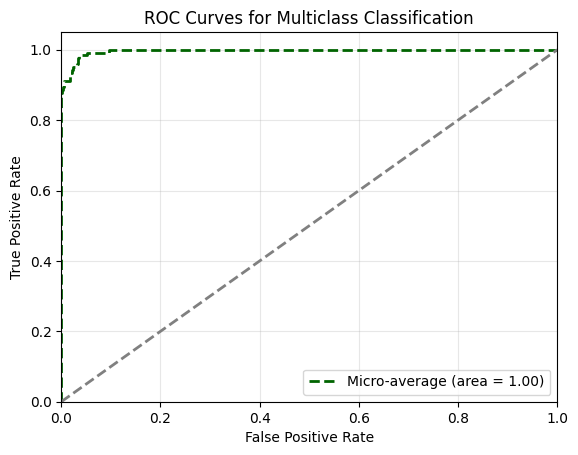

In [295]:
# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='darkgreen', linestyle='--', lw=2,
         label=f'Micro-average (area = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

KNN Model

In [296]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

In [297]:
# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [299]:
# ---------------------- Model Building ----------------------

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [300]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9268


In [301]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[  5   1   0   0   0]
 [  1   1   1   1   0]
 [  1   0   1   3   0]
 [  0   0   0 107   0]
 [  0   0   0   1   0]]


In [302]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.50      0.25      0.33         4
           2       0.50      0.20      0.29         5
           3       0.96      1.00      0.98       107
           4       0.00      0.00      0.00         1

    accuracy                           0.93       123
   macro avg       0.53      0.46      0.47       123
weighted avg       0.90      0.93      0.91       123



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [303]:
# Binarize the output
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

In [304]:
# Predict probabilities
y_prob = knn.predict_proba(X_test)
y_prob

array([[0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0.4, 0.4, 0. , 0.2, 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0.8, 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0

In [305]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [306]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

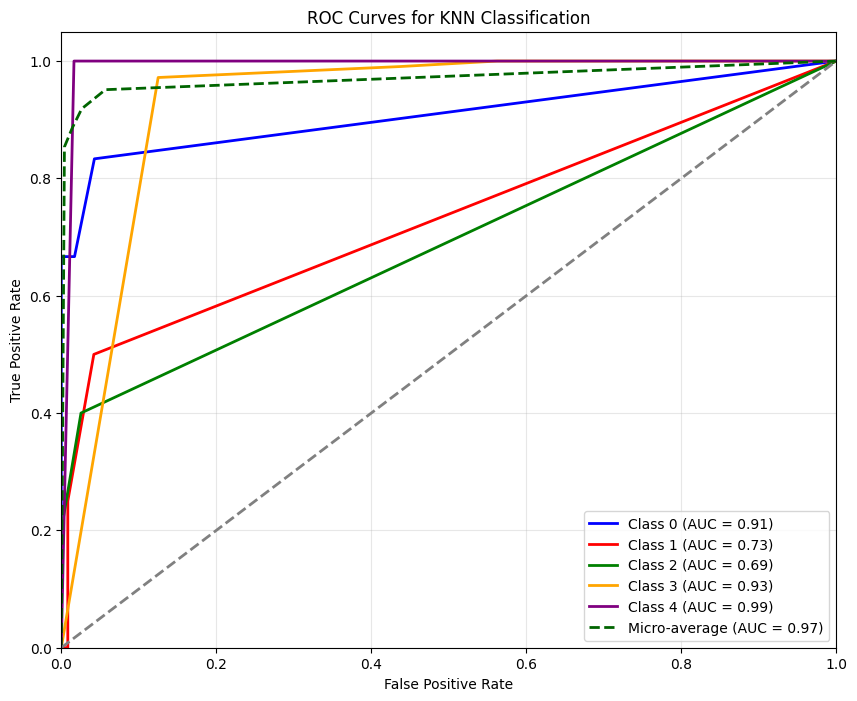

In [307]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], color='darkgreen', linestyle='--', lw=2,
         label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for KNN Classification')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Decision tree classification model


In [308]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [309]:
# For Decision Tree, scaling is not necessary
X_scaled = X

In [310]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [311]:

# ---------------------- Build Decision Tree Model ----------------------

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [312]:
# ---------------------- Model Evaluation ----------------------

y_pred = dt_model.predict(X_test)
y_pred

array([3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3])

In [313]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9187


In [314]:


# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[  5   0   1   0   0]
 [  1   2   0   1   0]
 [  1   2   1   1   0]
 [  2   1   0 104   0]
 [  0   0   0   0   1]]


In [315]:


# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       0.40      0.50      0.44         4
           2       0.50      0.20      0.29         5
           3       0.98      0.97      0.98       107
           4       1.00      1.00      1.00         1

    accuracy                           0.92       123
   macro avg       0.69      0.70      0.67       123
weighted avg       0.92      0.92      0.92       123



In [316]:
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

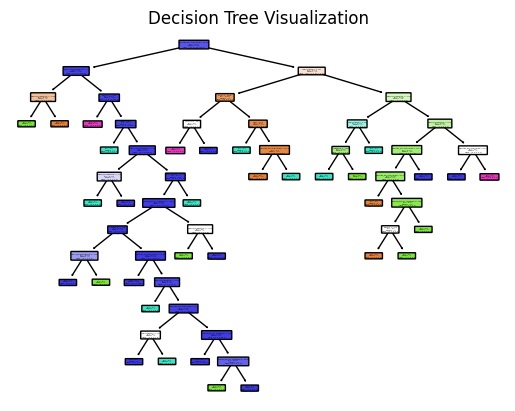

In [317]:


# Convert class labels to strings for visualization
class_names = [str(cls) for cls in le_category.classes_]

plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    rounded=True
)

plt.title("Decision Tree Visualization")
plt.show()

Random forest classifier


In [318]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
)

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [320]:
# ---------------------- Hyperparameter Tuning ----------------------

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [321]:
# Use the best estimator
rf_model = grid_search.best_estimator_

In [322]:
# ---------------------- Model Evaluation ----------------------
y_pred = rf_model.predict(X_test)
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3])

In [323]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.9431


In [324]:

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[  5   1   0   0   0]
 [  1   1   1   1   0]
 [  1   0   2   2   0]
 [  0   0   0 107   0]
 [  0   0   0   0   1]]


In [325]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.50      0.25      0.33         4
           2       0.67      0.40      0.50         5
           3       0.97      1.00      0.99       107
           4       1.00      1.00      1.00         1

    accuracy                           0.94       123
   macro avg       0.77      0.70      0.72       123
weighted avg       0.93      0.94      0.93       123



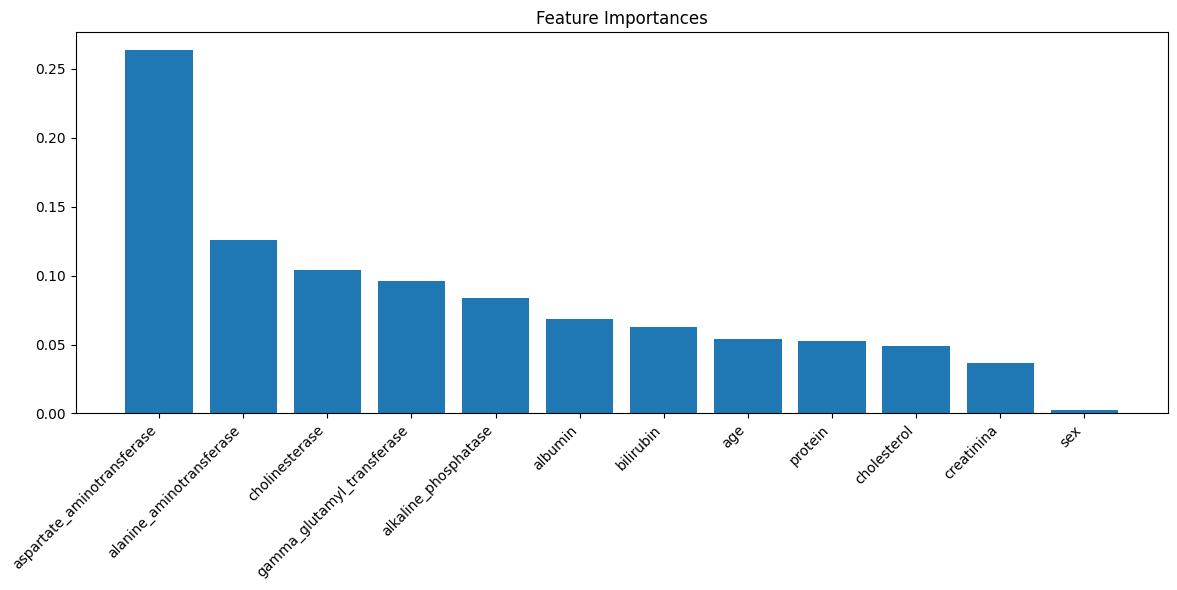

Feature importance chart saved as 'feature_importances.png'


In [326]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=45, ha='right')
plt.tight_layout()
plt.savefig('feature_importances.png')  # Exporting as image file
plt.show()

print("Feature importance chart saved as 'feature_importances.png'")

In [327]:
# ---------------------- ROC-AUC and Precision-Recall ----------------------
# Binarize the output for multiclass ROC
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

In [328]:
# Predict probabilities
y_prob = rf_model.predict_proba(X_test)
y_prob


array([[1.25944584e-05, 9.31050089e-05, 4.20956096e-04, 9.99473344e-01,
        0.00000000e+00],
       [2.62184366e-05, 7.84623341e-05, 4.05100605e-04, 9.99490219e-01,
        0.00000000e+00],
       [5.07141799e-03, 3.79618546e-04, 7.41986032e-02, 9.17850360e-01,
        2.50000000e-03],
       [1.63054233e-01, 2.11278639e-01, 1.32113239e-01, 4.85637223e-01,
        7.91666667e-03],
       [8.50419661e-05, 2.00577003e-04, 1.28486352e-04, 9.99585895e-01,
        0.00000000e+00],
       [2.62184366e-05, 7.84623341e-05, 9.89781556e-05, 9.99796341e-01,
        0.00000000e+00],
       [2.62184366e-05, 1.48447503e-04, 5.38025365e-03, 9.94445080e-01,
        0.00000000e+00],
       [1.27621844e-03, 2.25971855e-02, 5.12585988e-03, 9.69750736e-01,
        1.25000000e-03],
       [1.78217082e-03, 5.67826072e-03, 6.49585760e-04, 9.91889983e-01,
        0.00000000e+00],
       [9.11547619e-02, 1.42977383e-01, 1.27791810e-01, 6.38076045e-01,
        0.00000000e+00],
       [2.62184366e-05, 7.8462

In [329]:
# ROC-AUC Score (macro average)
roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
print(f"\nROC-AUC Score (macro average): {roc_auc:.4f}")


ROC-AUC Score (macro average): 0.9841


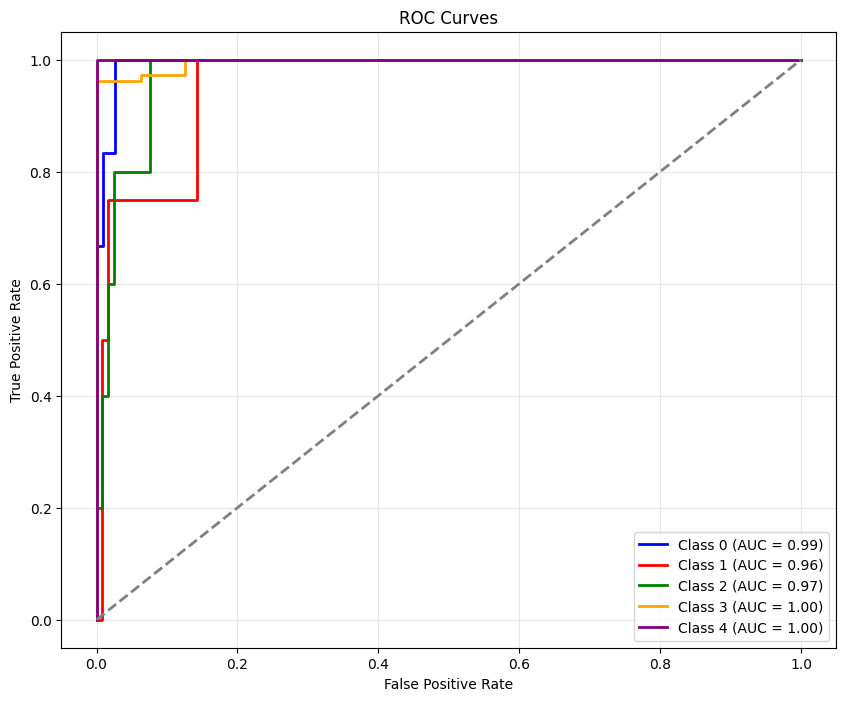

In [330]:
# Plot ROC Curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
             label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

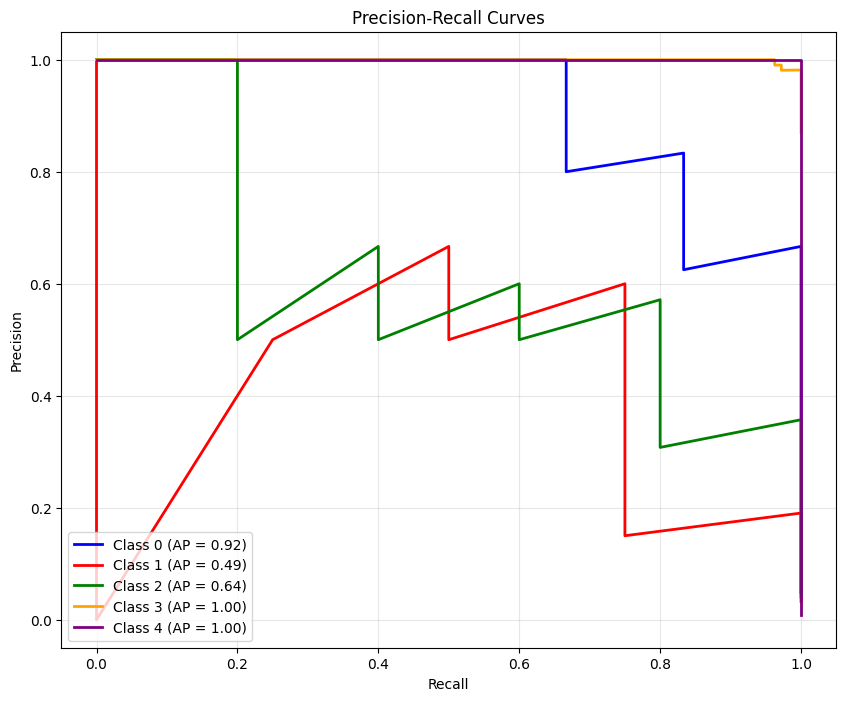

In [331]:
# ---------------------- Precision-Recall Curve ----------------------

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    avg_prec = average_precision_score(y_test_bin[:, i], y_prob[:, i])
    plt.plot(recall, precision, color=colors[i % len(colors)], lw=2,
             label=f'Class {classes[i]} (AP = {avg_prec:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

Naive Bayes classifier


In [332]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns




In [333]:
# Step 2: Feature Extraction
# Prepare the features and target variable for the classification model.
X = df.drop('category', axis=1)  # Features: All columns except the target
X


,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [334]:
y = df['category']  # Target: Disease categories (e.g., 'no disease', 'hepatitis')
y

,category
0,3
1,3
2,3
3,3
4,3
...,...
610,0
611,0
612,0
613,0


In [335]:

# Handle missing values
print("Checking for missing values:")
print(X.isnull().sum())
X.fillna(X.mean(), inplace=True)  # Impute missing numeric values with the mean

Checking for missing values:
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64


In [336]:
# Encode categorical features
categorical_cols = ['sex']  # Adjust if more categorical columns exist
for col in categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # Convert categorical strings to numeric values

# Scale numeric features
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) > 0:
    scaler = StandardScaler()
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    print("Numeric features scaled successfully.")
else:
    print("No numeric columns found for scaling.")

Numeric features scaled successfully.


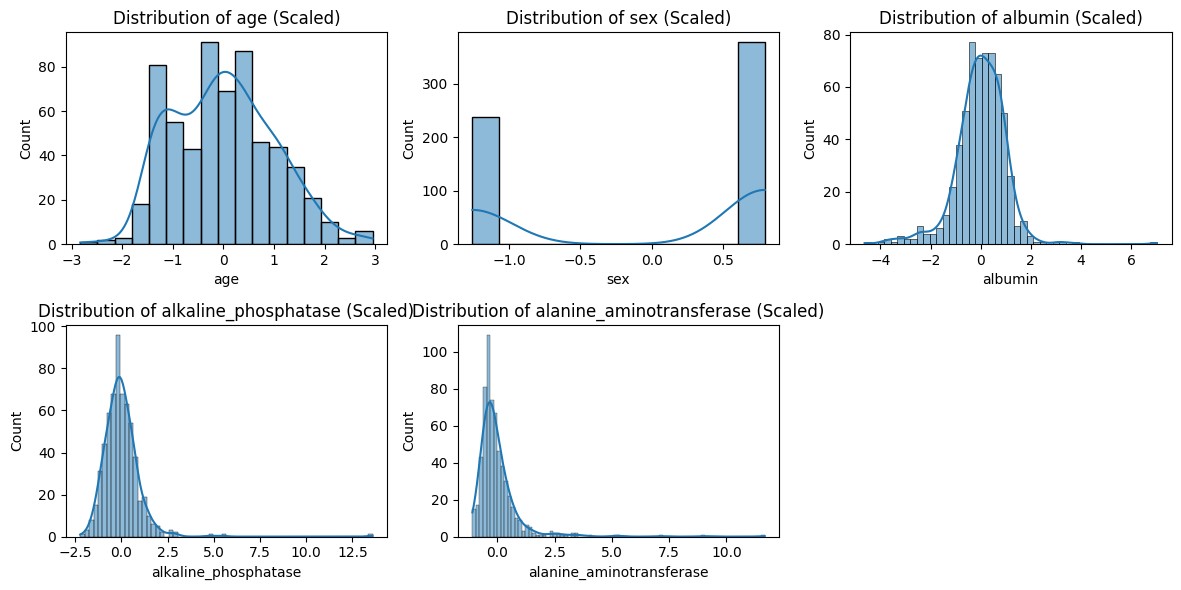

In [337]:


# Visualize feature distributions after preprocessing
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:5]):  # Limit to first 5 numeric features for readability
    plt.subplot(2, 3, i + 1)
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col} (Scaled)")
plt.tight_layout()
plt.show()

In [338]:


# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Model Building
# Train a Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [339]:


# Step 5: Model Evaluation
y_pred = model.predict(X_test)
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 3, 3, 3,
       3, 3, 1, 1, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3])

In [340]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [341]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = y.unique()

In [342]:
# Print all evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.unique().astype(str)))


Model Evaluation Metrics:
Accuracy: 0.92
Precision: 0.94
Recall: 0.92
F1-Score: 0.92

Detailed Classification Report:
              precision    recall  f1-score   support

           3       0.83      0.83      0.83         6
           4       0.38      0.75      0.50         4
           2       1.00      0.20      0.33         5
           1       0.97      0.96      0.97       107
           0       0.50      1.00      0.67         1

    accuracy                           0.92       123
   macro avg       0.74      0.75      0.66       123
weighted avg       0.94      0.92      0.92       123



In [343]:
# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

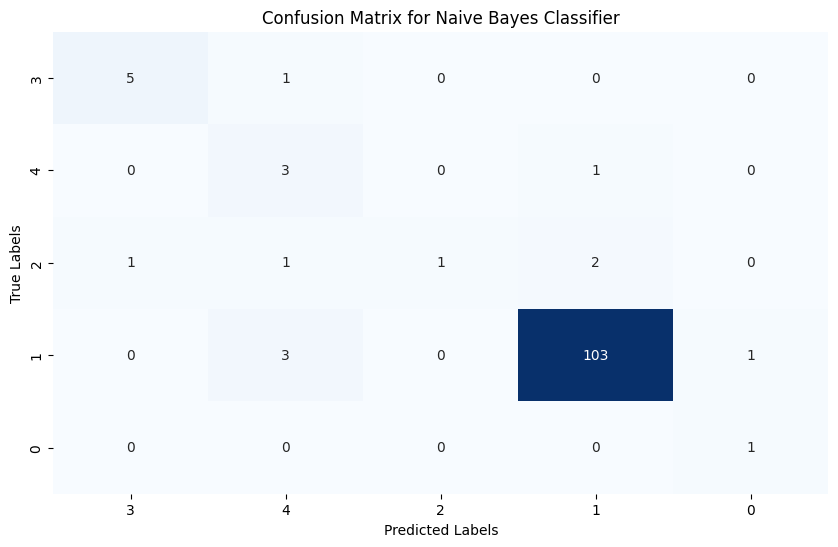

In [344]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [345]:

# Step 8: Visualize ROC Curves for Multi-Class Classification
# Binarize the labels for ROC curve plotting
y_test_binarized = label_binarize(y_test, classes=y.unique())
n_classes = y_test_binarized.shape[1]

In [346]:

# Use OneVsRestClassifier for multi-class ROC
model_ovr = OneVsRestClassifier(GaussianNB())
y_score = model_ovr.fit(X_train, y_train).predict_proba(X_test)

In [347]:

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

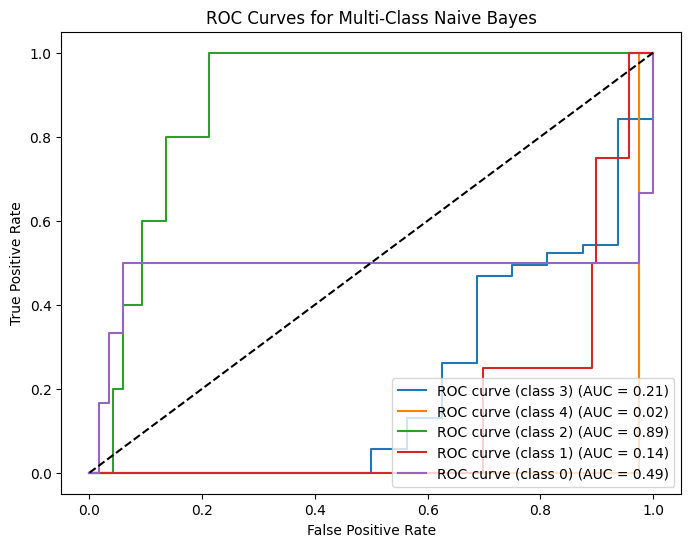

In [348]:

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {y.unique()[i]}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.title("ROC Curves for Multi-Class Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [349]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Ensure y_pred_proba is initialized here

In [350]:

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.unique().astype(str)))


Model Evaluation Metrics:
Accuracy: 0.92
Precision: 0.94
Recall: 0.92
F1-Score: 0.92

Detailed Classification Report:
              precision    recall  f1-score   support

           3       0.83      0.83      0.83         6
           4       0.38      0.75      0.50         4
           2       1.00      0.20      0.33         5
           1       0.97      0.96      0.97       107
           0       0.50      1.00      0.67         1

    accuracy                           0.92       123
   macro avg       0.74      0.75      0.66       123
weighted avg       0.94      0.92      0.92       123



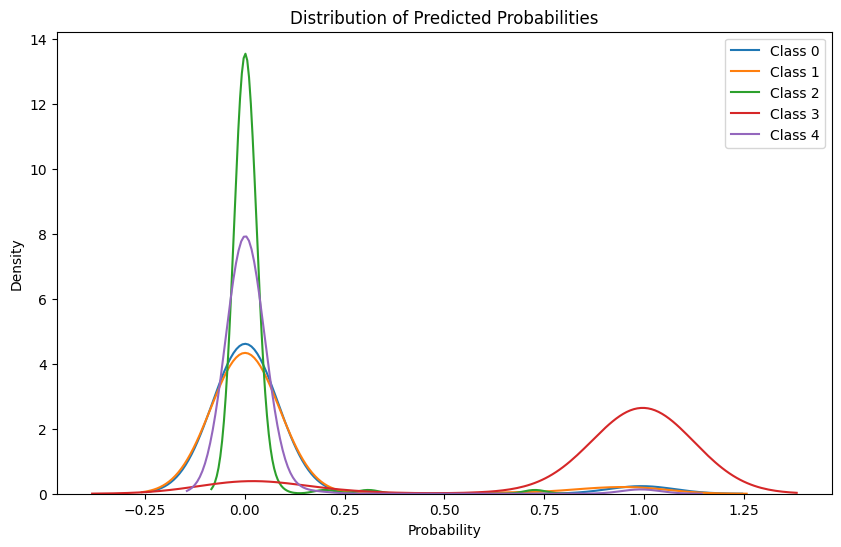

In [351]:
# Step 6: Visualize Predicted Probabilities
# Plot the predicted probabilities for each class
plt.figure(figsize=(10, 6))
for i in range(len(model.classes_)):  # Iterate over the number of classes
    sns.kdeplot(y_pred_proba[:, i], label=f'Class {model.classes_[i]}')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

**SVM **



In [352]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [353]:
# Step 2: Feature Extraction
# Prepare the features and target variable for the classification model.
X = df.drop('category', axis=1)  # Features: All columns except the target
X


,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [354]:
y = df['category']  # Target: Disease categories (e.g., 'no disease', 'hepatitis')
y

,category
0,3
1,3
2,3
3,3
4,3
...,...
610,0
611,0
612,0
613,0


In [355]:
# Handle missing values
print("Checking for missing values:")
print(X.isnull().sum())
X.fillna(X.mean(), inplace=True)  # Impute missing numeric values with the mean

Checking for missing values:
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64


In [356]:


# Encode categorical features
categorical_cols = ['sex']  # Adjust if more categorical columns exist
for col in categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # Convert categorical strings to numeric values
# Scale numeric features
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) > 0:
    scaler = StandardScaler()
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    print("Numeric features scaled successfully.")
else:
    print("No numeric columns found for scaling.")

Numeric features scaled successfully.


In [357]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [358]:


# Step 4: Model Building
# Train an SVM classifier
model = SVC(kernel='linear', probability=True)  # Use 'linear' kernel for simplicity
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [359]:

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [360]:

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.unique().astype(str)))


Model Evaluation Metrics:
Accuracy: 0.91
Precision: 0.89
Recall: 0.91
F1-Score: 0.90

Detailed Classification Report:
              precision    recall  f1-score   support

           3       0.67      0.67      0.67         6
           4       0.33      0.25      0.29         4
           2       0.33      0.20      0.25         5
           1       0.95      0.99      0.97       107
           0       0.00      0.00      0.00         1

    accuracy                           0.91       123
   macro avg       0.46      0.42      0.43       123
weighted avg       0.89      0.91      0.90       123



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [361]:

# Step 6: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = y.unique()

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

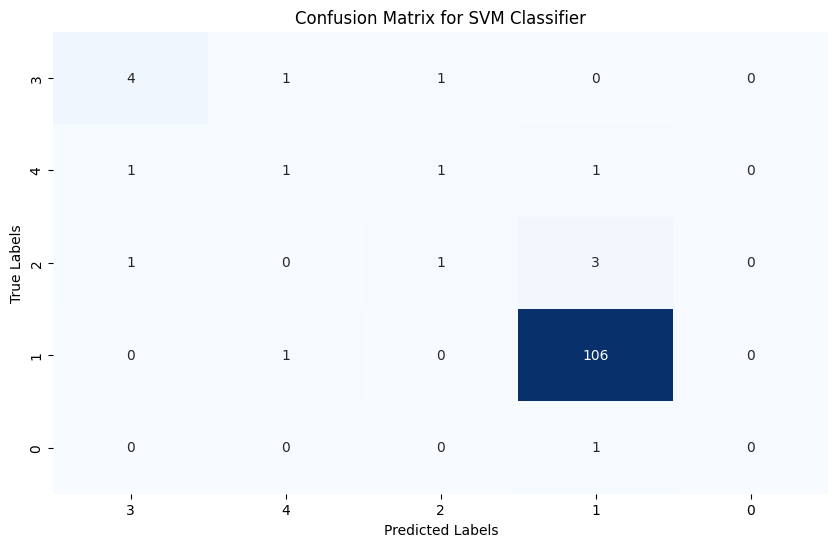

In [362]:

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Gradient Boosting Models (XGBoost)

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

In [364]:
# Encode target labels
labeler = LabelEncoder()
df["target"] = labeler.fit_transform(df["category"])
print("Target mapping:", dict(zip(labeler.classes_, labeler.transform(labeler.classes_))))

Target mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4)}


In [365]:
# Features & target
X = df.drop(columns=["category", "target"])
y = df["target"]


In [366]:
# Identify feature types
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]   # e.g. ['sex']

In [367]:
# --------------------------------------------------
# 2. Pre-processing
# --------------------------------------------------
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="if_binary", sparse_output=False))  # ✅ updated
])



In [368]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # choose 2 or 3
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [369]:

# 3. Model Building (XGBoost)
# Initialize the XGBoost classifier
model = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [370]:

# 4. Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3])

In [371]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.00      0.00      0.00         4
           2       0.33      0.20      0.25         5
           3       0.96      1.00      0.98       107
           4       1.00      1.00      1.00         1

    accuracy                           0.92       123
   macro avg       0.59      0.57      0.58       123
weighted avg       0.89      0.92      0.90       123



In [372]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define all models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine (SVM)": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Evaluate models and collect accuracy
model_accuracies = [
    ("Logistic Regression", 0.93),
    ("K-Nearest Neighbors (KNN)", 0.93),
    ("Decision Tree", 0.92),
    ("Random Forest", 0.94),
    ("Naive Bayes", 0.92),
    ("Support Vector Machine (SVM)", 0.91),
    ("XGBoost", 0.92)
]

# Convert results to DataFrame for better visualization
accuracy_df = pd.DataFrame(model_accuracies, columns=["Model", "Accuracy"])
print("\nModel Accuracy Comparison:")
print(accuracy_df)


Model Accuracy Comparison:
                          Model  Accuracy
0           Logistic Regression      0.93
1     K-Nearest Neighbors (KNN)      0.93
2                 Decision Tree      0.92
3                 Random Forest      0.94
4                   Naive Bayes      0.92
5  Support Vector Machine (SVM)      0.91
6                       XGBoost      0.92
